In [9]:
#import
import pandas as pd
import numpy as np

In [10]:
#df = pd.read_csv("gnb_normalize_dataset_fix.csv")
df = pd.read_csv("dataset_iklim_new.csv", delimiter=";", thousands=".", decimal=",", parse_dates=["Tanggal"], index_col="Tanggal")

df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C


- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- Tn: Temperatur minimum (°C)
- Tx: Temperatur maksimum (°C)
- **Tavg: Temperatur rata-rata (°C)**
- **RH_avg: Kelembapan rata-rata (%)**
- **RR: Curah hujan (mm)**
- **ss: Lamanya penyinaran matahari (jam)**
- ff_x: Kecepatan angin maksimum (m/s)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)

Next... checking datatypes

In [11]:
df = df.drop(['Tavg','ff_x','ddd_x','ff_avg','ddd_car'], axis = 1)
df

,Tn,Tx,RH_avg,RR,ss
Tanggal,,,,,
2020-01-01,20.4,28.2,87.0,43.3,4.4
2020-01-02,21.2,28.8,90.0,2.6,3.9
2020-01-03,21.4,28.8,86.0,1.9,4.6
2020-01-04,21.6,28.6,86.0,2.1,3.0
2020-01-05,22.0,28.3,88.0,1.0,1.3
...,...,...,...,...,...
2022-09-04,19.8,29.0,78.0,0.0,9.0
2022-09-05,19.4,29.3,78.0,16.4,5.7
2022-09-06,19.0,29.4,81.0,0.0,2.6


In [12]:
df = df.dropna()
df

,Tn,Tx,RH_avg,RR,ss
Tanggal,,,,,
2020-01-01,20.4,28.2,87.0,43.3,4.4
2020-01-02,21.2,28.8,90.0,2.6,3.9
2020-01-03,21.4,28.8,86.0,1.9,4.6
2020-01-04,21.6,28.6,86.0,2.1,3.0
2020-01-05,22.0,28.3,88.0,1.0,1.3
...,...,...,...,...,...
2022-09-04,19.8,29.0,78.0,0.0,9.0
2022-09-05,19.4,29.3,78.0,16.4,5.7
2022-09-06,19.0,29.4,81.0,0.0,2.6


then, drop the rows with value 8888 (data tidak terukur a.k.a not measured) and 9999 (Tidak Ada Data (tidak dilakukan pengukuran) a.k.a no data), because we don't need it. 

Based on observation above, the value with 8888 and 9999 is only in the columns with column called rr (curah hujan)

In [13]:
# delete row with 8888 value
df.drop(df[df['RR'] == 8888].index, inplace=True)
df.drop(df[df['RR'] == 9999].index, inplace=True)
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_10312\816279575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 8888].index, inplace=True)
C:\Users\akuradz\AppData\Local\Temp\ipykernel_10312\816279575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 9999].index, inplace=True)


,Tn,Tx,RH_avg,RR,ss
Tanggal,,,,,
2020-01-01,20.4,28.2,87.0,43.3,4.4
2020-01-02,21.2,28.8,90.0,2.6,3.9
2020-01-03,21.4,28.8,86.0,1.9,4.6
2020-01-04,21.6,28.6,86.0,2.1,3.0
2020-01-05,22.0,28.3,88.0,1.0,1.3
...,...,...,...,...,...
2022-09-04,19.8,29.0,78.0,0.0,9.0
2022-09-05,19.4,29.3,78.0,16.4,5.7
2022-09-06,19.0,29.4,81.0,0.0,2.6


In [ ]:
# get mean of Tn and Tx, assign to new column called "TnTxAvg"
df["TAvg"] = (df["Tn"] + df["Tx"]) / 2
# df["curahHujanPerTahun"] = (df["RR"]) / 365
df[df["RR"] > 50]


In [26]:
df_mean = pd.DataFrame()
df_mean['suhu_min'] = df.Tn.resample('M').mean().ffill()
df_mean['suhu_max'] = df.Tx.resample('M').mean().ffill()
df_mean['kelembaban_udara'] = df.RH_avg.resample('M').ffill()
df_mean['curah_hujan'] = df.RR.resample('M').sum().ffill()
df_mean['lama_penyinaran'] = df.ss.resample('M').ffill()
df_mean['TAvg'] = (df_mean['suhu_min'] + df_mean['suhu_max']) / 2
# drop df_mean suhu_min and suhu_max
df_mean = df_mean.drop(['suhu_min','suhu_max'], axis = 1)
df_mean

# print(df_mean.shape)
# sort by tanggal as datetime in tanggal

,kelembaban_udara,curah_hujan,lama_penyinaran,TAvg
Tanggal,,,,
2020-01-31,80.0,10.910000,2.0,25.135000
2020-02-29,85.0,17.324138,4.1,25.039655
2020-03-31,79.0,7.703226,7.1,25.266129
2020-04-30,74.0,5.317241,3.1,25.279310
2020-05-31,86.0,4.679310,7.4,25.006897
2020-06-30,77.0,0.106667,8.0,23.771667
2020-07-31,74.0,0.580000,10.3,23.098333
2020-08-31,75.0,2.513636,10.0,23.663636
2020-09-30,74.0,0.317647,7.0,24.500000


<AxesSubplot:xlabel='Tanggal'>

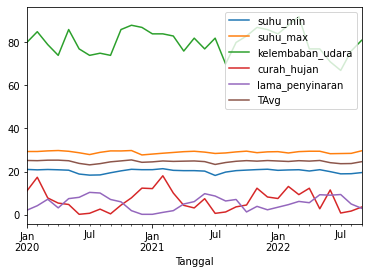

In [19]:
df_mean.plot()

In [ ]:
# check type of data
df_mean.dtypes

In [ ]:
# create new column with three categorical level value 0, 1, 2 based on rr value

labels = ['BURUK','BAIK']

good_temprature = np.arange(12.8, 30.3, 0.1)
good_kelembapan = 
good_lamapenyinaran = 
good_curahhujan = 

# df['tn_level'] = pd.cut(df['tn'], bins=3, labels=labels)
# df['tx_level'] = pd.cut(df['tx'], bins=3, labels=labels)
# init empty dataframe
df_discreted = pd.DataFrame()
# if t_avg is range inside good_temprature, assign to new column tavg_level
df_discreted['tavg_level'] = np.where(df_mean['tavg'].isin(good_temprature), 'BAIK', 'BURUK')
df_discreted['rh_avg_level'] = np.where(df_mean['rh_avg'].isin(good_kelembapan), 'BAIK', 'BURUK')
df_discreted['rr_level'] = np.where(df_mean['rr'].isin(good_curahhujan), 'BAIK', 'BURUK')
df_discreted['ss_level'] = np.where(df_mean['ss'].isin(good_lamapenyinaran), 'BAIK', 'BURUK')

# df_mean['ss_level'] = pd.cut(df_mean['ss'], bins=3, labels=labels)
# df_mean['ff_x_level'] = pd.cut(df_mean['ff_x'], bins=3, labels=labels)
# df_mean['ddd_x_level'] = pd.cut(df_mean['ddd_x'], bins=3, labels=labels)
# df_mean['ff_avg_level'] = pd.cut(df_mean['ff_avg'], bins=3, labels=labels)

# df_mean.drop(['tavg','rh_avg','rr','ss'], axis = 1, inplace=True)

df_discreted


In [ ]:
# show df where is tavg_level is BAIK
df[df['rh_avg_level'] == 'BAIK']

In [ ]:

# iterate each row in dataframe
for index, row in df.iterrows():
    # count value with TINGGI value
    tinggi = 0

    # loop each column in dataframe
    for col in df.columns:
        # check if value is TINGGI
        if row.loc[col] == 'BAIK':
            tinggi += 1
  
    # calculate probability
    prob = tinggi / 4
    # set row column presentase with probability value
    
    df.loc[index, 'presentase'] = prob

    df.loc[index, 'peluang_pertumbuhan'] = 'BURUK' if prob < 0.5 else 'BAIK' 
df

In [ ]:
df[df['presentase'] > 0.50]

In [ ]:
# labelling df

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_labelled = df.apply(le.fit_transform)
df_labelled.head()

In [ ]:
# min max normalization sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_labelled)
df_norm = scaler.transform(df_labelled)
df_norm = pd.DataFrame(df_norm, columns=df_labelled.columns)
df_norm.head()

In [ ]:
#  variabel bebas
print(df_labelled.columns)
y = df_labelled['peluang_pertumbuhan']
#variabel tidak bebas
y

In [ ]:
x = df_labelled.drop(['peluang_pertumbuhan','presentase'], axis=1)

x

In [ ]:
# separate the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# import the model using multinomial naive bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# train the model
gnb.fit(x_train, y_train)

# predict the model
y_pred = gnb.predict(x_test)

# import the metrics
from sklearn import metrics

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
y_pred

In [ ]:
# plot naive bayes confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_, normalize='true')
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

plt.show()


In [ ]:
# show the y_test based on separation dataset
# np.array(y_test)

# show the confusion matrix based on the prediction result 
#evaluate performance from the confusion matrix 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# show all probability for each predicted class 
gnb.predict_proba(x_test)

In [ ]:
new_data = [28, 84, 84, 400]

# fit with discrete values

new_data = le.transform(new_data)


# predict the new data
y_new_pred = gnb.predict([new_data])

# show the prediction result
y_new_pred



